# Randomized PCA

* Scikit-Learn oferuje kolejną opcję wykonywania PCA, zwaną **Randomized PCA**. 

* Jest to algorytm stochastyczny, który szybko znajduje przybliżenie pierwszych składowych głównych. 

* Jego złożoność obliczeniowa wynosi $O(m × d^2) + O (d^3)$, zamiast $O(m × n^2) + O(n^3)$, więc jest znacznie szybsza niż poprzednie algorytmy, gdy $d$ jest znacznie mniejsze niż $n$.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target
print(X.shape, " ", y.shape)

(70000, 784)   (70000,)


# Zad
Wykonaj Randomized PCA.

In [5]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)

# Zad
Porołożoność czasową
* PCA
* Incremental PCA
* Randomized PCA

dla ilości komponentów:

* 2
* 10
* 154

In [7]:

import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 2.1 seconds
    IncrementalPCA: 28.6 seconds
    PCA: 2.2 seconds
n_components = 10
    PCA: 2.6 seconds
    IncrementalPCA: 29.9 seconds
    PCA: 2.5 seconds
n_components = 154
    PCA: 7.3 seconds
    IncrementalPCA: 39.4 seconds
    PCA: 7.2 seconds


# Zad

Porównanie czasowe


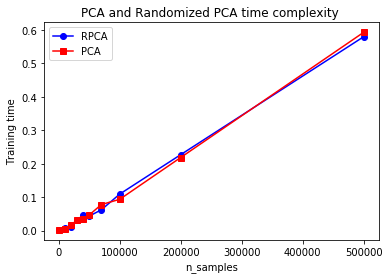

In [10]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")
plt.show()

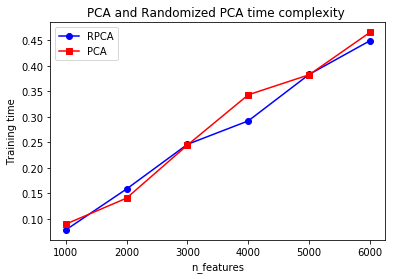

In [14]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")
plt.show()